## Little training monitor

Tails a `lighting_logs/version_X` directory for train/val loss.

In [21]:
# %pip install datasets transformers zstandard matplotlib
import torch
import text_data
import conv_text
import numpy as np
import pandas as pd


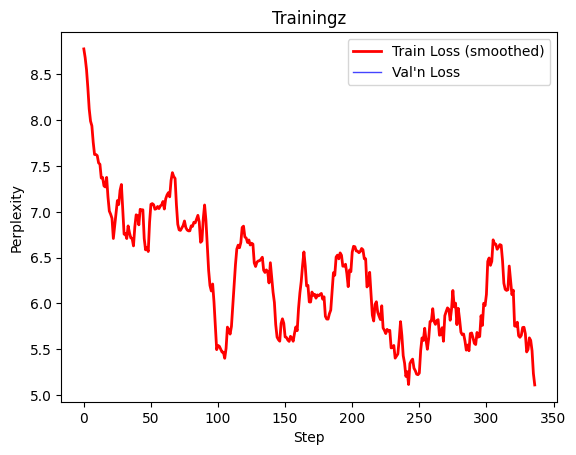

In [22]:
tdat = pd.read_csv('lightning_logs/version_1/metrics.csv')
train = tdat.train_loss[~np.isnan(tdat.train_loss)]

xspace = np.linspace(0, len(train), len(train))
fsz = max(20, len(train)//20)
filter = np.ones(fsz)/fsz
# filter =  np.linspace(0.25, 1.75, num=fsz)/fsz

import matplotlib.pyplot as plt

# plt.plot( train, label = 'Train Loss', color='#fdd', linewidth=1)
plt.plot( np.convolve(train, filter, mode='valid'), label = 'Train Loss (smoothed)', color='r', linewidth=2)
if 'val_loss' in tdat.columns:
    val = tdat.val_loss[~np.isnan(tdat.val_loss)]
    plt.plot( val, label = 'Val\'n Loss', color='#44f', linewidth=1)

plt.xlabel('Step')
plt.ylabel('Perplexity')
plt.legend(loc='upper right')
plt.title('Trainingz')
plt.show()


In [23]:
np.mean(tdat.train_loss[-100:])


5.717955535650253

In [24]:
tdat.val_loss[~np.isnan(tdat.val_loss)]

180    6.438625
Name: val_loss, dtype: float64

In [25]:
tdat[-100:]

,train_loss,length,epoch,step,val_loss
257,3.539803,9.0,0,25699,NaN
258,3.004967,10.0,0,25799,NaN
259,2.937977,9.0,0,25899,NaN
260,3.468048,8.0,0,25999,NaN
261,8.161521,122.0,0,26099,NaN
...,...,...,...,...,...
352,5.587161,38.0,0,35199,NaN
353,0.943673,7.0,0,35299,NaN
354,3.000744,13.0,0,35399,NaN
355,1.912202,10.0,0,35499,NaN
